In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Codes.utils.datautils import Readdataset, Splitview, calculate_dataset_metrics


# Importing the Dataset & Calculating Its Shape

We've imported our dataset using custom utility functions, and by calculating the shape, we've confirmed the number of signals (N) and time steps (T) available for analysis. This step lays the foundation for reliable exploration and further transformation of our time series data.

In [2]:
Dataset_name = "BeetleFly"
dataset_path_ = "UCRArchive_2018/"
Xtrain, ytrain, Xval, yval, Xtest, ytest = Readdataset(dataset_path_, Dataset_name)
N, T = calculate_dataset_metrics(Xtrain)

In [5]:
type(Xtrain)

numpy.ndarray

# Data Split into Three Views

Using Splitview, Xtrain is transformed into:
- Raw signals.
- Frequency domain (FFT).
- Derivative view.

These forms are further reshaped (via melt) for analysis.


In [14]:
Xraw, Xfft, Xder = Splitview(Xtrain, T)


We now build new dataframes from the signals (Xtrain) and enrich them with labels and a unique signal id. For a clearer view and easier plotting, we melt each dataframe into long form—the raw view, the FFT‐based view (by taking the magnitude), and the derivative view (using first order difference).

Below is the corresponding code:


In [16]:
df_raw = pd.DataFrame(Xraw, columns = ['t' + str(i+1) for i in range(T)])
df_raw['label'] = ytrain
df_raw['label'] = df_raw['label'].astype('category')
df_raw['signal_id'] = df_raw.index

df_fft = pd.DataFrame(Xfft, columns = ['t' + str(i+1) for i in range(T)])
df_fft['label'] = ytrain
df_fft['label'] = df_fft['label'].astype('category')
df_fft['signal_id'] = df_fft.index

df_der = pd.DataFrame(Xder, columns = ['t' + str(i+1) for i in range(T)])
df_der['label'] = ytrain
df_der['label'] = df_der['label'].astype('category')
df_der['signal_id'] = df_der.index

In [17]:
df_long_raw = pd.melt(df_raw, id_vars = ['label', 'signal_id'], value_vars = ['t' + str(i+1) for i in range(T)], var_name = 'timestep', value_name = 'value')
df_long_fft = pd.melt(df_fft, id_vars = ['label', 'signal_id'], value_vars = ['t' + str(i+1) for i in range(T)], var_name = 'timestep', value_name = 'value')
df_long_der = pd.melt(df_der, id_vars = ['label', 'signal_id'], value_vars = ['t' + str(i+1) for i in range(T)], var_name = 'timestep', value_name = 'value')
df_long_raw['timestep'] = df_long_raw['timestep'].str.replace('t', '').astype(int)
df_long_fft['timestep'] = df_long_fft['timestep'].str.replace('t', '').astype(int)
df_long_der['timestep'] = df_long_der['timestep'].str.replace('t', '').astype(int)

Plotting the rules now

In [54]:
def plot_df(_type = 'raw', mid = 256, timeseries_len = 512, threshold = 0 ):
    if _type == 'raw':
        df_long = df_long_raw
    elif _type == 'fft':
        df_long = df_long_fft
    else:
        df_long = df_long_der
    if mid <= 1:
        low = mid
    else:
        low = mid - 1
    if mid >= (timeseries_len - 1):
        high = mid
    else:
        high = mid + 1
    low = 470 
    high =490
    subset_df = df_long[(df_long['timestep'] >= low) & (df_long['timestep'] <= high)]
    sns.lineplot(data=subset_df, x='timestep', y='value', hue='label', style='label', units='signal_id', estimator=None, lw = 0.5, palette = 'Set1')
    plt.title(f'{_type} view of the dataset')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.axhline(y = 0.2, color = 'black', linestyle = 'solid')
    plt.axvline(x = 477, color = 'black', linestyle = 'dashed')
    plt.axvline(x = 481, color = 'black', linestyle = 'dashed')

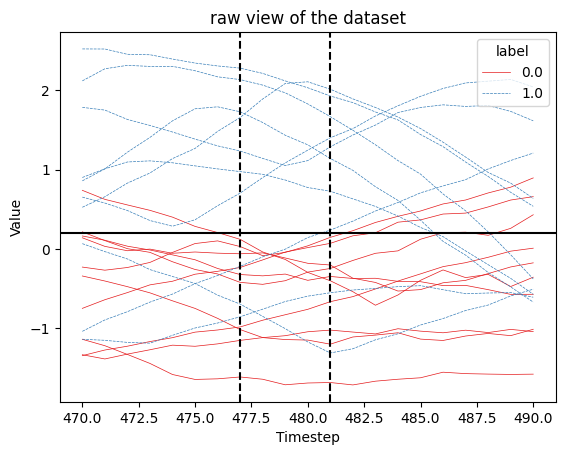

In [55]:
plot_df("raw")

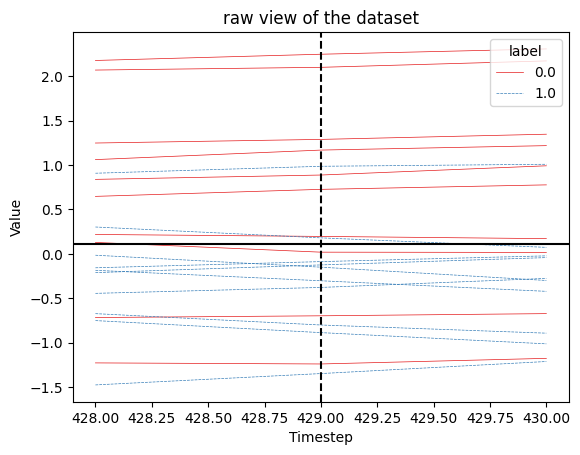

In [42]:
plot_df("raw", mid = 429, threshold = 0.11)

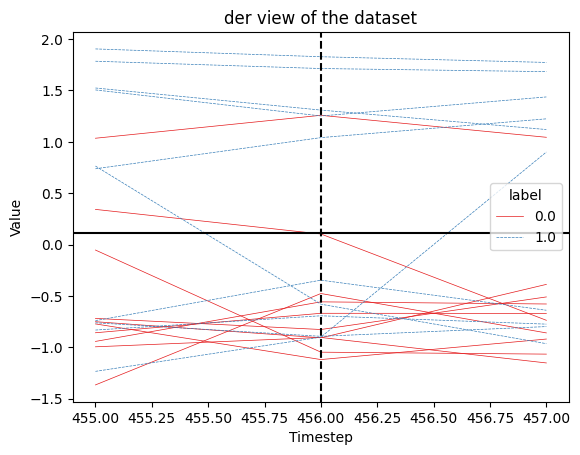

In [37]:
plot_df(_type = "der", threshold = 0.11, mid = 456)

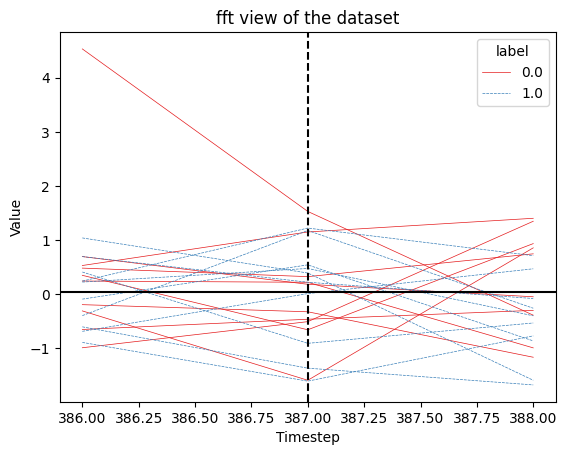

In [38]:
plot_df(_type = "fft", threshold = 0.04, mid = 387)

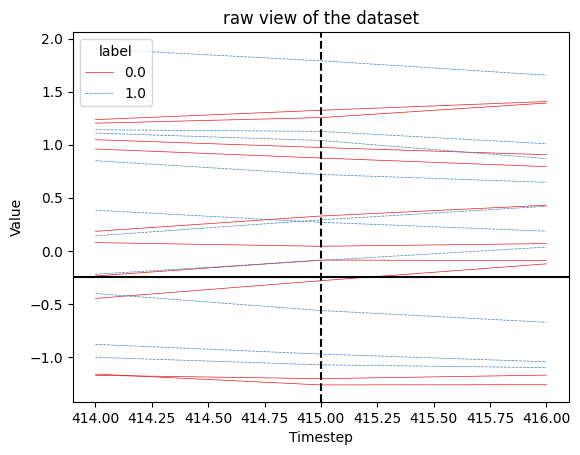

In [44]:
plot_df(_type = "raw", threshold = -0.25, mid = 415)

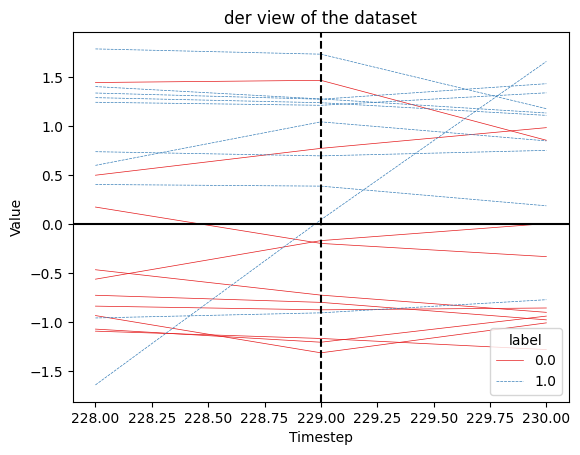

In [40]:
plot_df(_type = "der", mid = 229, threshold = 0.0067)

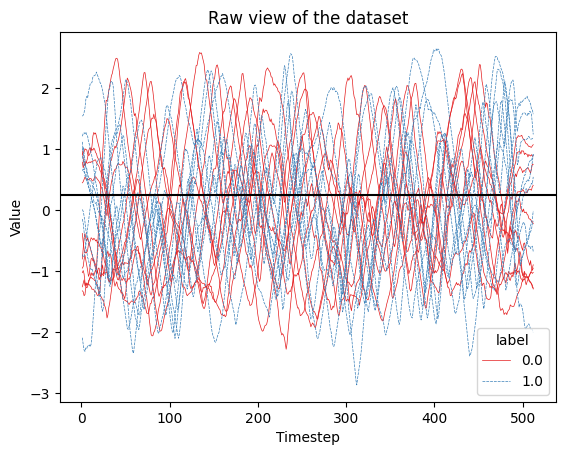

In [19]:
sns.lineplot(data = df_long_raw, x = 'timestep', y = 'value', hue = 'label', style = 'label', units = 'signal_id', estimator = None, lw = 0.5, palette = 'Set1')
plt.title('Raw view of the dataset')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.axhline(y = 0.25, color = 'black', linestyle = 'solid')